# Import Packages

In [1]:
#%config Completer.use_jedi = False
import numpy as np 
#import pandas as pd 
import matplotlib.pyplot as plt #https://matplotlib.org/stable/tutorials/images.html
# import matplotlib.image as mpimg
#from PIL import Image
#import seaborn as sns
import cv2 # computer vision, ML, image processing https://www.geeksforgeeks.org/opencv-python-tutorial/#getting
import random     # random.shaffle the list data https://www.w3schools.com/python/ref_random_shuffle.asp
import os     # https://www.tutorialsteacher.com/python/os-module#:~:text=The%20OS%20module%20in%20Python,with%20the%20underlying%20operating%20system.
import imageio # work with images https://imageio.readthedocs.io/en/stable/index.html
#import plotly.graph_objects as go
#import plotly.express as px
#import plotly.figure_factory as ff
#from plotly.subplots import make_subplots
from collections import Counter # create a dictionary that stores labels as keys and their counts as values https://www.hackerrank.com/challenges/collections-counter/problem

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, plot_confusion_matrix
#from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE  #https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

#import tensorflow as tf
#import tensorflow_addons as tfa
#import keras
from keras.models import Sequential # construct layers of neural network https://keras.io/guides/sequential_model/
from keras.layers import Dense, Dropout, Activation, Flatten
# Activation - activation function
# Flatten - https://keras.io/api/layers/reshaping_layers/flatten/
# Dense -  Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. Dense layer does the below operation on the input and return the output. https://keras.io/api/layers/core_layers/dense/

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization 
# Conv2D - 2D convolution layer https://keras.io/api/layers/convolution_layers/convolution2d/#:~:text=2D%20convolution%20layer%20(e.g.%20spatial,to%20the%20outputs%20as%20well.
# MaxPooling2D - https://keras.io/api/layers/pooling_layers/max_pooling2d/

#from keras.applications import resnet
#from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
#from keras.applications.resnet import ResNet50
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [2]:
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [3]:
#"/kaggle/input/iqothnccd-lung-cancer-dataset"
#"/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases"

Path to data:

In [4]:
directory = r'/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset' #r - for raw string (https://www.digitalocean.com/community/tutorials/python-raw-string)
categories = ['Bengin cases', 'Malignant cases', 'Normal cases'] # each category is a folder

# Image Size Variations

Create a dictionary: Category (e.g. Malignant): size(e.g. 512x512): number of images

In [5]:
size_data = {}
for i in categories:
    path = os.path.join(directory, i) # the path for each category e.g. /kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases
#    print(path)
    class_num = categories.index(i) # the index in "categories"
#    print(class_num)
    temp_dict = {}
#    print(os.listdir(path)) 
    for file in os.listdir(path):    # os.listdir(path) returns a list of files in each category folder 
        filepath = os.path.join(path, file) # the path for each jpg file
#        print(filepath)
        height, width, channels = imageio.imread(filepath).shape # for each image: size + RGB (512 512 3)
#        print(height, width, channels)
        if str(height) + ' x ' + str(width) in temp_dict: # add new sizes in to the dictionary and count the images
            temp_dict[str(height) + ' x ' + str(width)] += 1 
        else:
            temp_dict[str(height) + ' x ' + str(width)] = 1
#    print(temp_dict)
    size_data[i] = temp_dict # makes a dictionary where keys are the categories and values are dictionaries "temp_dict"
        
size_data

{'Bengin cases': {'512 x 512': 120},
 'Malignant cases': {'512 x 512': 501,
  '512 x 623': 31,
  '512 x 801': 28,
  '404 x 511': 1},
 'Normal cases': {'512 x 512': 415, '331 x 506': 1}}

Examples of images in each category

Bengin cases
(512, 512)
[[38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 ...
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]]


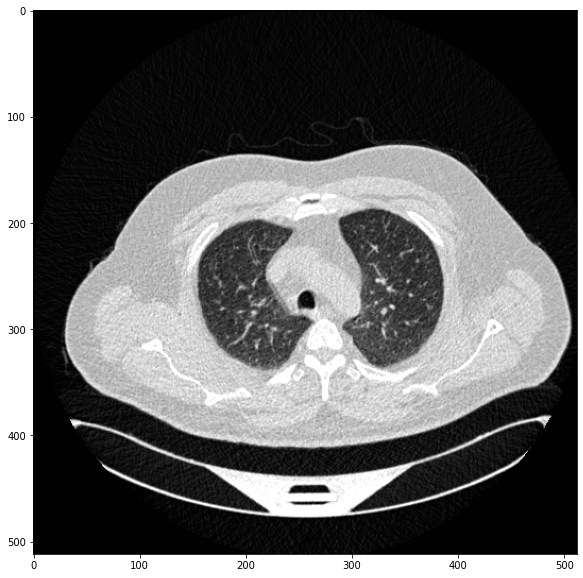

Malignant cases
(512, 512)
[[38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 ...
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]]


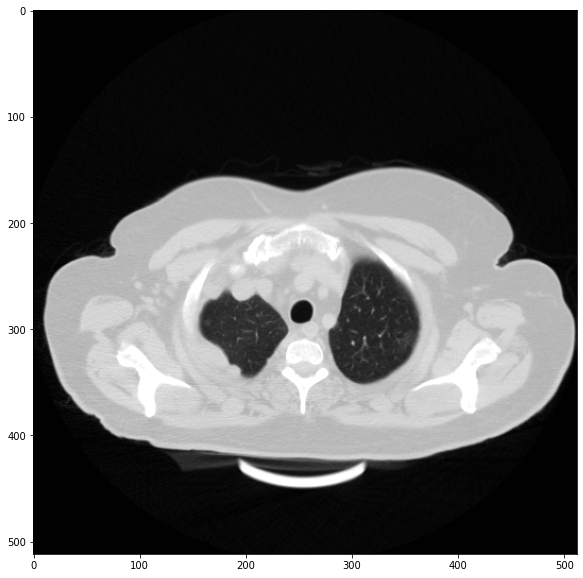

Normal cases
(512, 512)
[[38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 ...
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]]


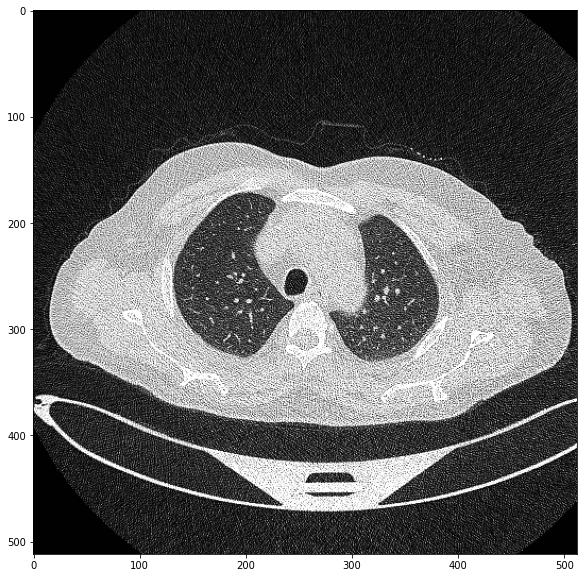

In [6]:
for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        print(i)                      # category
        img = cv2.imread(filepath,0) # loads an image to img
        print(img.shape)
        print(img)
        plt.figure(figsize = (10,10))
        plt.imshow(img, cmap='gray')               # show the image
        plt.show()
        break

# Image Preprocessing and Testing

For each category show 3 examples of image processing (orginal image, resized and blurred)

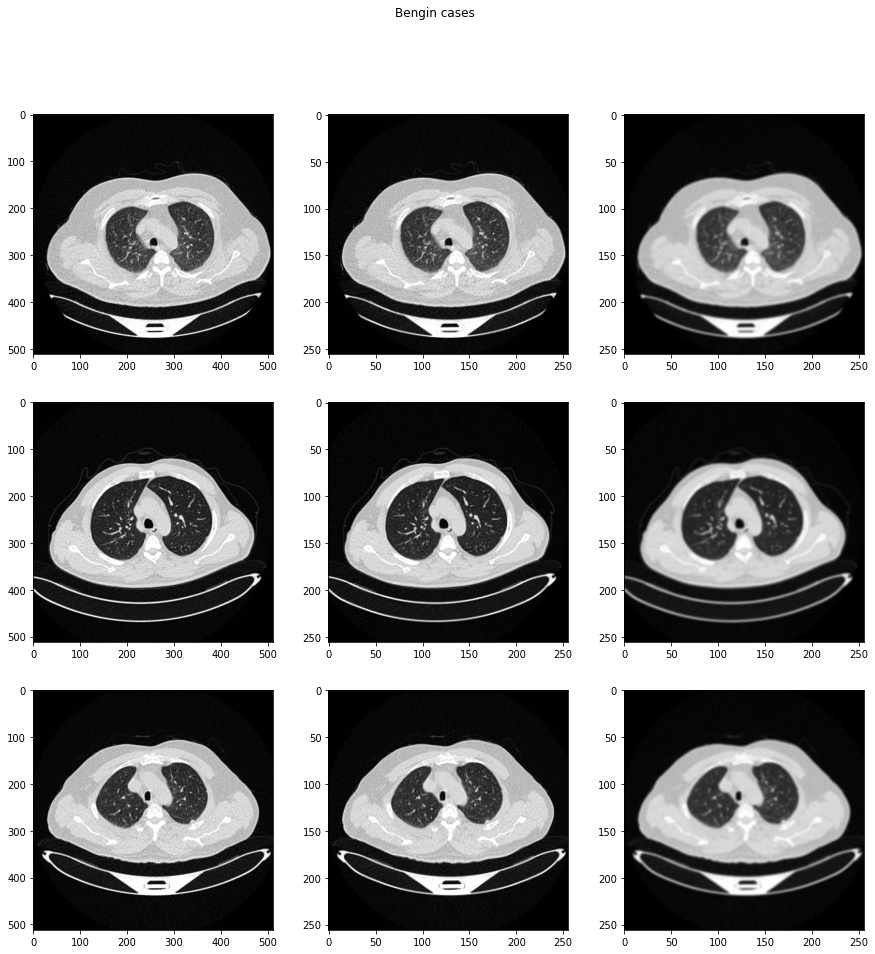

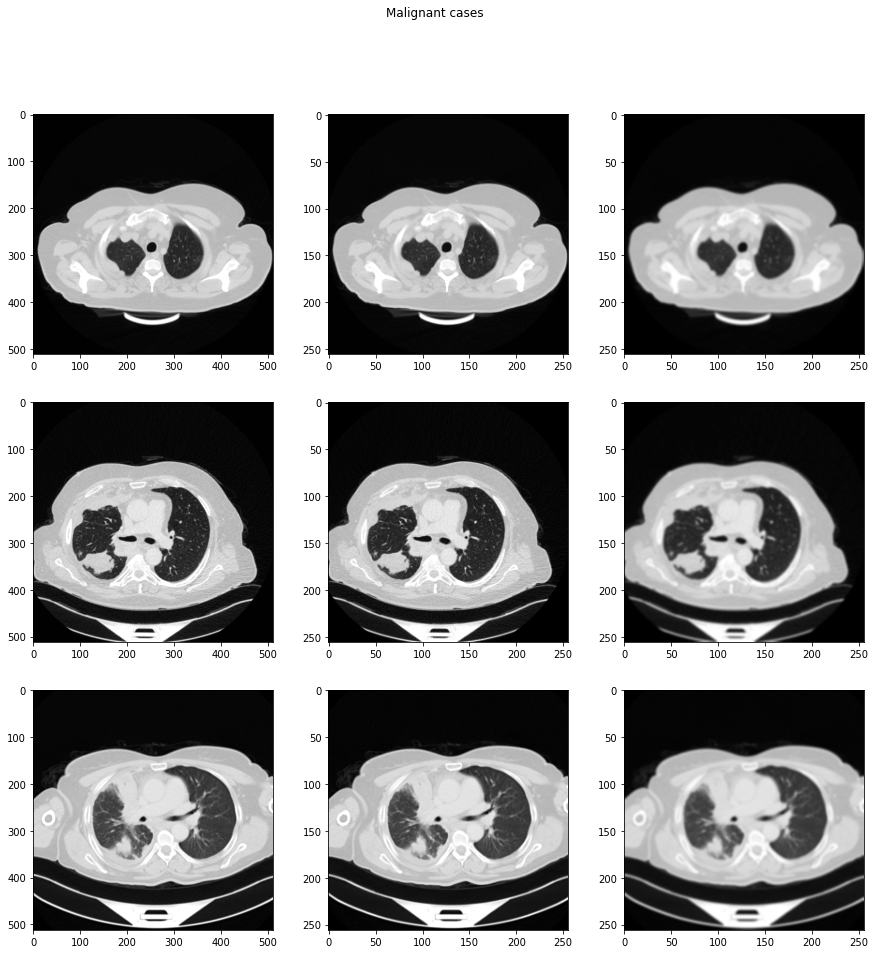

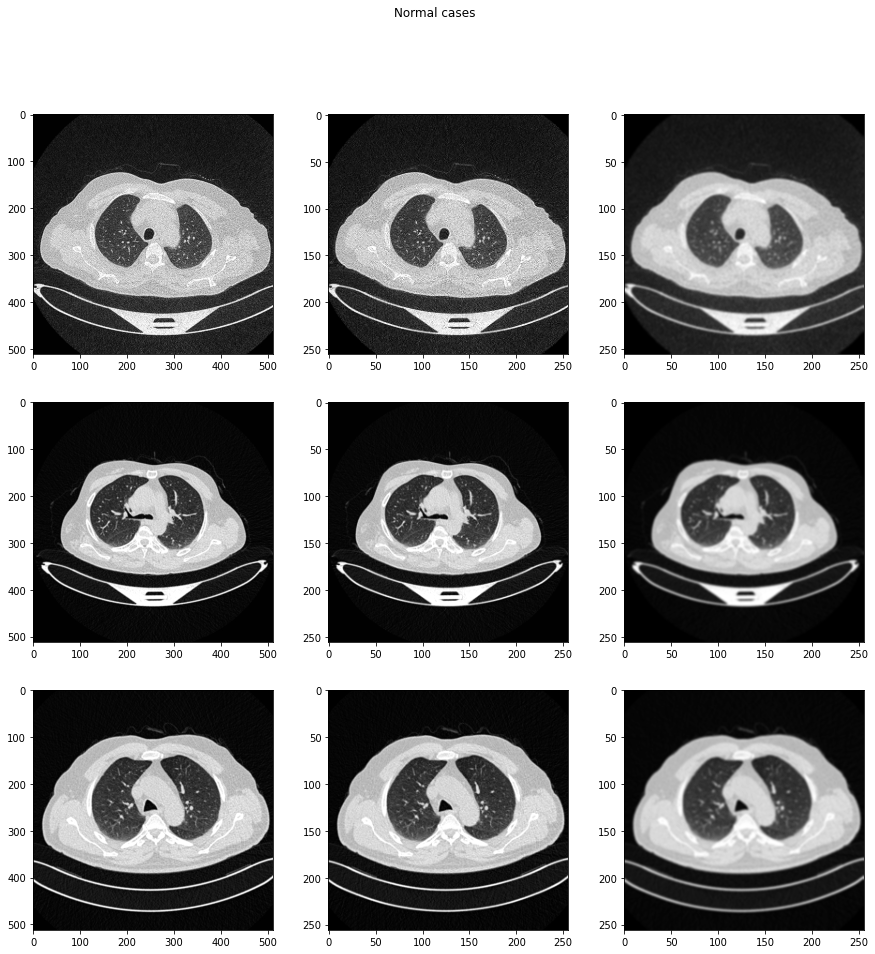

In [7]:
img_size = 256   # set the size of the image (height = width) 
for i in categories:
    cnt, samples = 0, 3  #cnt defines the number of images to show (see below); samples define the number of rows
    fig, ax = plt.subplots(samples, 3, figsize=(15, 15))  # grid: 3 (height) X 3 (width)
    fig.suptitle(i)                                       # category name at the top
    
    path = os.path.join(directory, i)
    class_num = categories.index(i)
#    print(os.listdir(path))
    for curr_cnt, file in enumerate(os.listdir(path)):     # enumerate iterates and count elements (count, file)
#        print(curr_cnt, file)
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        
        img0 = cv2.resize(img, (img_size, img_size))      # resize the image https://www.geeksforgeeks.org/image-resizing-using-opencv-python/
        
        img1 = cv2.GaussianBlur(img0, (5, 5), 0)          # imply GaussianBlur https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/#gsc.tab=0
        
        ax[cnt, 0].imshow(img, cmap='gray')    # show the orginal image
        ax[cnt, 1].imshow(img0, cmap='gray')   # show the resized image
        ax[cnt, 2].imshow(img1, cmap='gray')   # show the blurred image
        cnt += 1
        if cnt == samples:
            break
        
plt.show()

# Preparing Data

In [8]:
data = []
img_size = 256

for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        # preprocess here
        img = cv2.resize(img, (img_size, img_size))
        data.append([img, class_num])    # create a list of images + category 
        
random.shuffle(data)     # shaffle the list data https://www.w3schools.com/python/ref_random_shuffle.asp

X, y = [], [] 
for feature, label in data:     # create a list of features (images) and list of labels (categories)
    X.append(feature)
    y.append(label)
    
print('X length:', len(X))
print('y counts:', Counter(y)) # create a dictionary that stores labels as keys and their counts as values https://www.hackerrank.com/challenges/collections-counter/problem

# normalize
#print (X[0])
#print (X[0].shape)
X = np.array(X).reshape(-1, img_size, img_size, 1) # from to list to array; from 2D array to 3D array; https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
#print (X[0])
X = X / 255.0
#print (X[0])
y = np.array(y)

X length: 1097
y counts: Counter({1: 561, 2: 416, 0: 120})


In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=10, stratify=y) #https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

print(len(X_train), X_train.shape)
print(len(X_valid), X_valid.shape)

822 (822, 256, 256, 1)
275 (275, 256, 256, 1)


# Applying SMOTE to oversample the data

https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [10]:
print(Counter(y_train), Counter(y_valid))

Counter({1: 420, 2: 312, 0: 90}) Counter({1: 141, 2: 104, 0: 30})


In [11]:
print(len(X_train), X_train.shape)

X_train = X_train.reshape(X_train.shape[0], img_size*img_size*1)

print(len(X_train), X_train.shape)

822 (822, 256, 256, 1)
822 (822, 65536)


In [12]:
print('Before SMOTE:', Counter(y_train))
smote = SMOTE()
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)
print('After SMOTE:', Counter(y_train_sampled))

Before SMOTE: Counter({1: 420, 2: 312, 0: 90})
After SMOTE: Counter({2: 420, 1: 420, 0: 420})


In [13]:
X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_train_sampled = X_train_sampled.reshape(X_train_sampled.shape[0], img_size, img_size, 1)

print(len(X_train), X_train.shape)
print(len(X_train_sampled), X_train_sampled.shape)

822 (822, 256, 256, 1)
1260 (1260, 256, 256, 1)


# Model Building with SMOTE data

In [14]:
model1 = Sequential() # construct layers of neural network https://keras.io/guides/sequential_model/

model1.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:])) #Conv2D - 2D convolution layer https://keras.io/api/layers/convolution_layers/convolution2d/#:~:text=2D%20convolution%20layer%20(e.g.%20spatial,to%20the%20outputs%20as%20well.
model1.add(Activation('relu'))    # # Activation - activation function
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))  ## MaxPooling2D - https://keras.io/api/layers/pooling_layers/max_pooling2d/

model1.add(Flatten())  # https://keras.io/api/layers/reshaping_layers/flatten/
model1.add(Dense(16))  # https://www.tutorialspoint.com/keras/keras_dense_layer.htm
model1.add(Dense(3, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 254, 254, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0         
_________________________________________________________________
dense (Dense)                (None, 16)                3

In [15]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model1.fit(X_train_sampled, y_train_sampled, batch_size=8, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
158/158 [==============================] - 10s 18ms/step - loss: 0.4233 - accuracy: 0.8540 - val_loss: 0.1565 - val_accuracy: 0.9636
Epoch 2/10
158/158 [==============================] - 2s 15ms/step - loss: 0.0287 - accuracy: 0.9952 - val_loss: 0.1329 - val_accuracy: 0.9782
Epoch 3/10
158/158 [==============================] - 2s 15ms/step - loss: 0.0281 - accuracy: 0.9937 - val_loss: 0.0642 - val_accuracy: 0.9709
Epoch 4/10
158/158 [==============================] - 2s 15ms/step - loss: 0.0357 - accuracy: 0.9960 - val_loss: 0.1623 - val_accuracy: 0.9636
Epoch 5/10
158/158 [==============================] - 2s 15ms/step - loss: 0.0092 - accuracy: 0.9984 - val_loss: 0.0971 - val_accuracy: 0.9636
Epoch 6/10
158/158 [==============================] - 2s 15ms/step - loss: 7.3740e-04 - accuracy: 1.0000 - val_loss: 0.1202 - val_accuracy: 0.9673
Epoch 7/10
158/158 [==============================] - 3s 16ms/step - loss: 6.4508e-04 - accuracy: 1.0000 - val_loss: 0.1865 - val_accurac

# Results

In [17]:
y_pred = model1.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 [==============================] - 1s 30ms/step
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       1.00      0.97      0.99       141
           2       0.94      1.00      0.97       104

    accuracy                           0.97       275
   macro avg       0.95      0.93      0.94       275
weighted avg       0.97      0.97      0.97       275

[[ 25   0   5]
 [  2 137   2]
 [  0   0 104]]


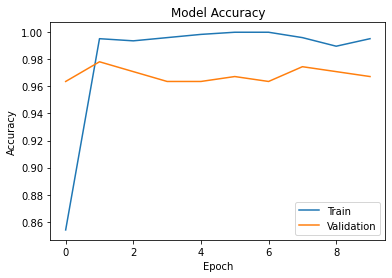

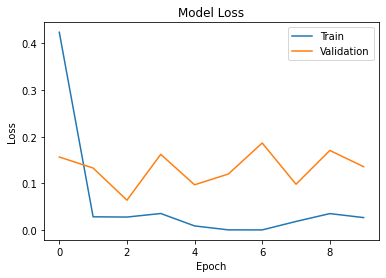

In [18]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Model Building with Class Weighted Approach

In [19]:
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(16))
model2.add(Dense(3, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 254, 254, 64)      640       
_________________________________________________________________
activation_1 (Activation)    (None, 254, 254, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)               

In [20]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
new_weights = {
    0: X_train.shape[0]/(3*Counter(y_train)[0]),
    1: X_train.shape[0]/(3*Counter(y_train)[1]),
    2: X_train.shape[0]/(3*Counter(y_train)[2]),
}

# new_weights[0] = 0.5
# new_weights[1] = 20

new_weights

{0: 3.0444444444444443, 1: 0.6523809523809524, 2: 0.8782051282051282}

In [22]:
history = model2.fit(X_train, y_train, batch_size=8, epochs=10, validation_data=(X_valid, y_valid), class_weight=new_weights)

Epoch 1/10
103/103 [==============================] - 2s 20ms/step - loss: 1.1079 - accuracy: 0.6618 - val_loss: 0.2580 - val_accuracy: 0.8982
Epoch 2/10
103/103 [==============================] - 2s 16ms/step - loss: 0.1466 - accuracy: 0.9623 - val_loss: 0.1691 - val_accuracy: 0.9345
Epoch 3/10
103/103 [==============================] - 2s 16ms/step - loss: 0.0450 - accuracy: 0.9891 - val_loss: 0.1422 - val_accuracy: 0.9636
Epoch 4/10
103/103 [==============================] - 2s 16ms/step - loss: 0.0406 - accuracy: 0.9939 - val_loss: 0.1338 - val_accuracy: 0.9600
Epoch 5/10
103/103 [==============================] - 2s 16ms/step - loss: 0.0285 - accuracy: 0.9939 - val_loss: 0.1377 - val_accuracy: 0.9709
Epoch 6/10
103/103 [==============================] - 2s 16ms/step - loss: 0.0263 - accuracy: 0.9951 - val_loss: 0.1157 - val_accuracy: 0.9709
Epoch 7/10
103/103 [==============================] - 2s 16ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1408 - val_accuracy: 0.9709

# Results

In [23]:
y_pred = model2.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       1.00      0.96      0.98       141
           2       0.95      1.00      0.97       104

    accuracy                           0.97       275
   macro avg       0.95      0.94      0.95       275
weighted avg       0.97      0.97      0.97       275

[[ 26   0   4]
 [  3 136   2]
 [  0   0 104]]


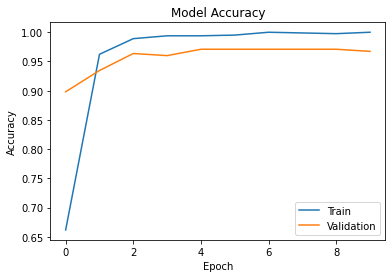

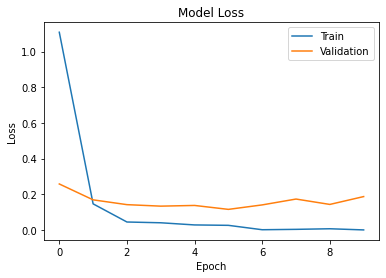

In [24]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Data Augmentation

https://en.wikipedia.org/wiki/Data_augmentation#:~:text=Data%20augmentation%20is%20a%20technique,modified%20copies%20of%20existing%20data.

In [25]:
train_datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True) 
val_datagen = ImageDataGenerator()

In [26]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=8) 
val_generator = val_datagen.flow(X_valid, y_valid, batch_size=8)

In [27]:
model3 = Sequential()

model3.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(16))
model3.add(Dense(3, activation='softmax'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 64)      640       
_________________________________________________________________
activation_2 (Activation)    (None, 254, 254, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)               

In [28]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history = model3.fit_generator(train_generator, epochs=5, validation_data=val_generator, class_weight=new_weights)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
103/103 [==============================] - 2s 18ms/step - loss: 1.1276 - accuracy: 0.5864 - val_loss: 0.8136 - val_accuracy: 0.5964
Epoch 2/5
103/103 [==============================] - 2s 17ms/step - loss: 0.6902 - accuracy: 0.7044 - val_loss: 0.6924 - val_accuracy: 0.7164
Epoch 3/5
103/103 [==============================] - 2s 17ms/step - loss: 0.3943 - accuracy: 0.8637 - val_loss: 0.3472 - val_accuracy: 0.8618
Epoch 4/5
103/103 [==============================] - 2s 17ms/step - loss: 0.2289 - accuracy: 0.9209 - val_loss: 0.2030 - val_accuracy: 0.9382
Epoch 5/5
103/103 [==============================] - 2s 17ms/step - loss: 0.2623 - accuracy: 0.9136 - val_loss: 0.2555 - val_accuracy: 0.9018


In [30]:
y_pred = model3.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        30
           1       0.98      0.86      0.92       141
           2       0.85      0.97      0.91       104

    accuracy                           0.90       275
   macro avg       0.87      0.90      0.88       275
weighted avg       0.91      0.90      0.90       275

[[ 26   0   4]
 [  6 121  14]
 [  1   2 101]]
